# Modeling

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from acquire import get_iris_data
from wrangle_mall import wrangle_mall

### Exercise 1
- Clustering with the Iris Dataset    

In [2]:
iris = get_iris_data()

- creating `petal_area` and `sepal_area` features

In [3]:
iris['petal_area'] = iris.petal_length * iris.petal_width
iris['sepal_area'] = iris.sepal_length * iris.sepal_width

In [4]:
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,petal_area,sepal_area
0,1,1,5.1,3.5,1.4,0.2,setosa,0.28,17.85
1,1,2,4.9,3.0,1.4,0.2,setosa,0.28,14.70
2,1,3,4.7,3.2,1.3,0.2,setosa,0.26,15.04
3,1,4,4.6,3.1,1.5,0.2,setosa,0.30,14.26
4,1,5,5.0,3.6,1.4,0.2,setosa,0.28,18.00


- splitting into train, validate, test

In [5]:
train_and_validate, test = train_test_split(iris, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.2, random_state=123)

In [6]:
train.shape, validate.shape, test.shape

((108, 9), (27, 9), (15, 9))

- Choose features other than the ones used in the lesson.
    - Visualize the results of your clustering.
    - Use the elbow method to visually select a good value for k.
    - Repeat the clustering, this time with 3 different features.

##### Scaling Data

In [7]:
scaler = StandardScaler()
cols = ['petal_length', 'sepal_length', 'petal_width', 'sepal_width', 'petal_area', 'sepal_area']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

##### Choosing Features

In [8]:
X1 = train_scaled[['petal_width', 'sepal_width']]

##### Optimizing for K

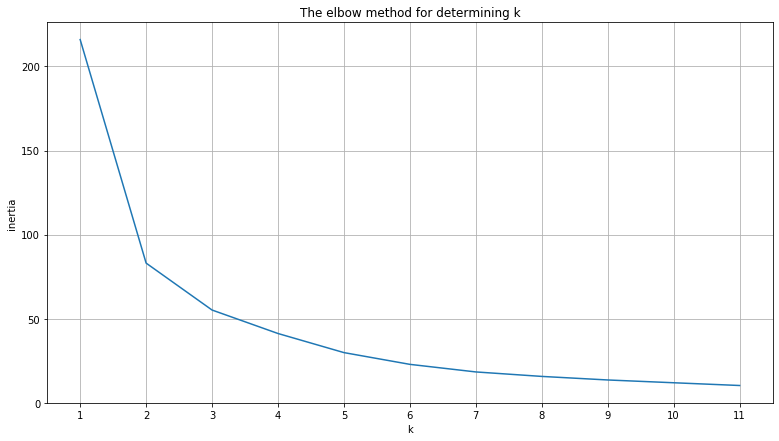

In [9]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X1)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

##### Selecting K and Fitting Features

In [10]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X1)
train['cluster'] = kmeans.labels_

##### Plotting Clusters

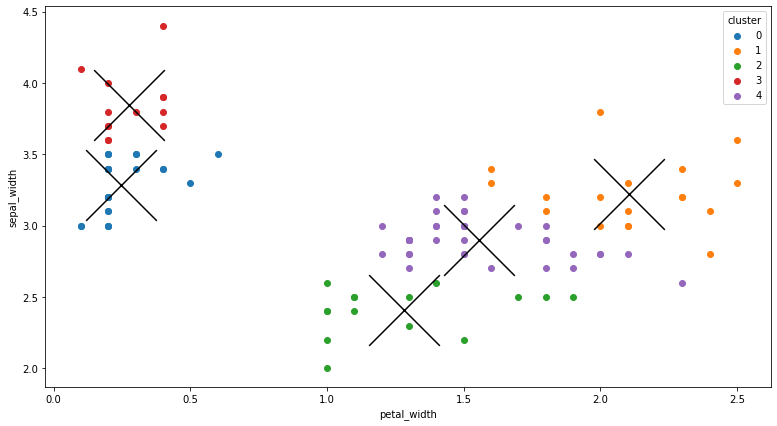

In [11]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.petal_width, subset.sepal_width, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='sepal width', xlabel='petal width')

train.groupby('cluster').mean().plot.scatter(y='sepal_width', x='petal_width', marker='x', s=5000, ax=ax, c='black')
plt.show()

##### Choosing Features

In [12]:
X2 = train_scaled[['petal_length', 'petal_width']]

##### Optimizing for K

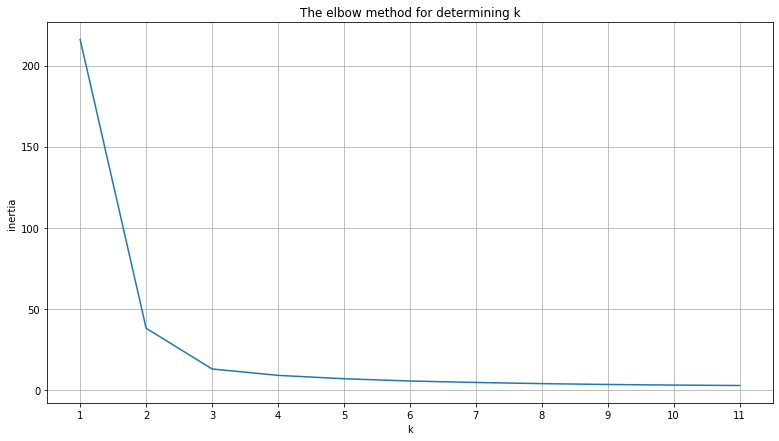

In [13]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X2)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

##### Selecting K and Fitting Features

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X2)
train['cluster'] = kmeans.labels_

##### Plotting Clusters

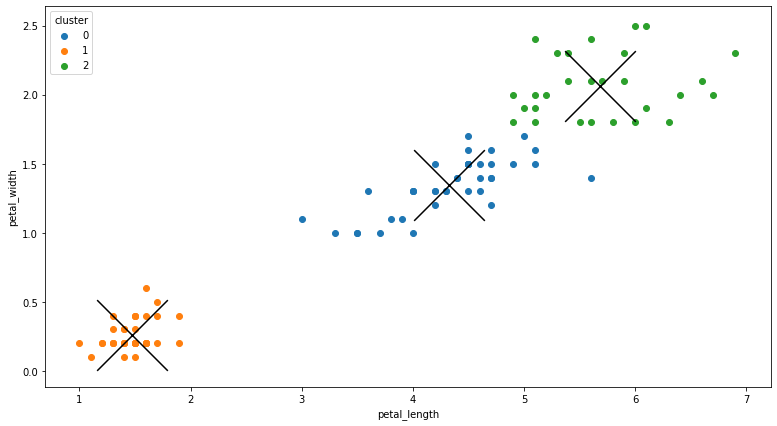

In [15]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.petal_length, subset.petal_width, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='petal width', xlabel='petal length')

train.groupby('cluster').mean().plot.scatter(y='petal_width', x='petal_length', marker='x', s=5000, ax=ax, c='black')
plt.show()

##### Choosing Features

In [16]:
X3 = train_scaled[['petal_area', 'sepal_area']]

##### Optimizing for K

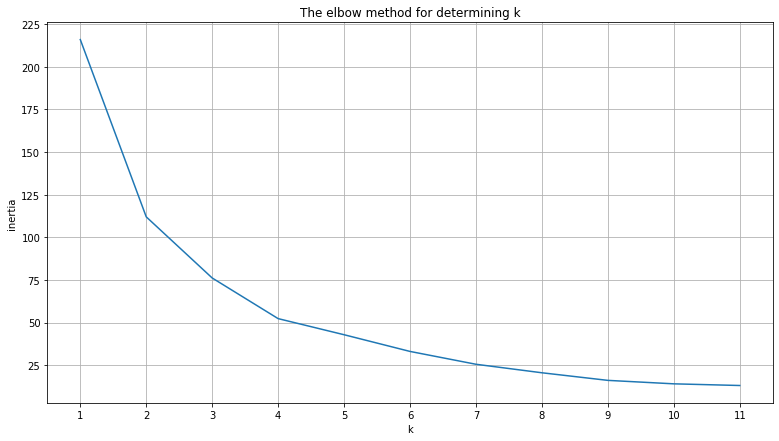

In [17]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X3)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

##### Selecting K and Fitting Features

In [18]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X1)
train['cluster'] = kmeans.labels_

##### Plotting Clusters

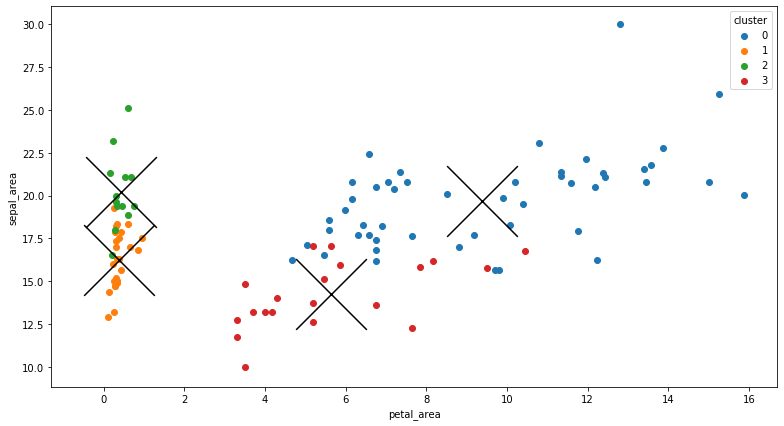

In [19]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.petal_area, subset.sepal_area, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='sepal area', xlabel='petal area')

train.groupby('cluster').mean().plot.scatter(y='sepal_area', x='petal_area', marker='x', s=5000, ax=ax, c='black')
plt.show()

### Exercise 2

- Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [20]:
train, validate, test = wrangle_mall()

In [21]:
train.head()

,age,annual_income,spending_score,Male,age_scaled,annual_income_scaled,spending_score_scaled
customer_id,,,,,,,
182,32,97,86,0,0.269231,0.738739,0.867347
49,29,40,42,0,0.211538,0.225225,0.418367
35,49,33,14,0,0.596154,0.162162,0.132653
186,30,99,97,1,0.230769,0.756757,0.979592
114,19,64,46,1,0.019231,0.441441,0.459184


##### Choosing Features

In [22]:
X1 = train[['annual_income_scaled', 'spending_score_scaled']]

##### Optimizing for K

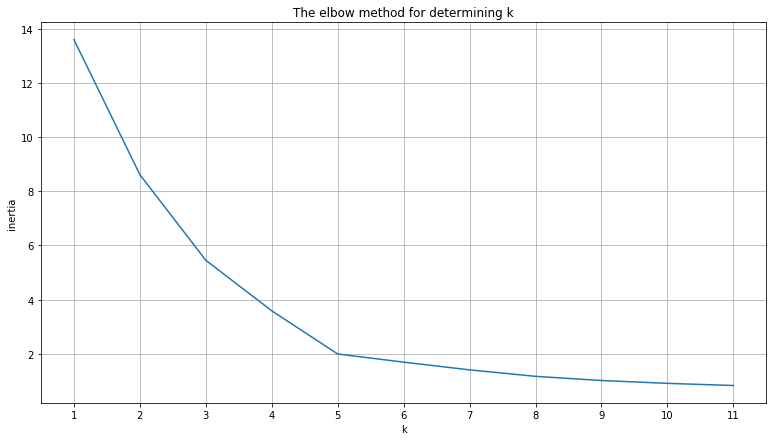

In [23]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X1)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

##### Selecting K and Fitting Features

In [24]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X1)
train['cluster'] = kmeans.labels_

##### Plotting Clusters

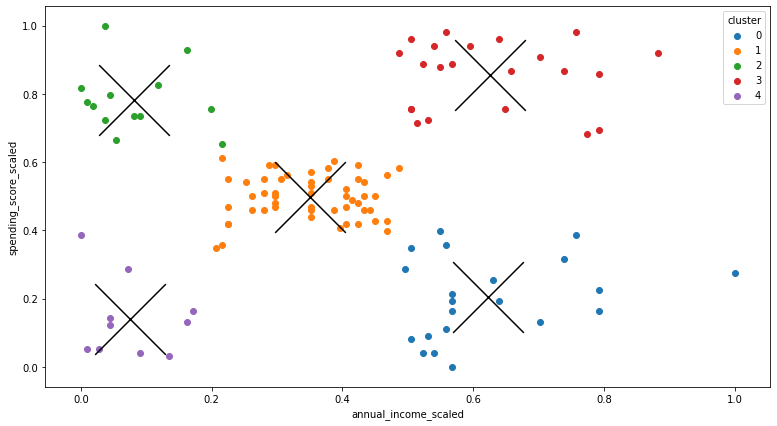

In [25]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.annual_income_scaled, subset.spending_score_scaled, label=cluster)
ax.legend(title='cluster')
ax.set(xlabel='annual income', ylabel='spending score')

train.groupby('cluster').mean().plot.scatter(x='annual_income_scaled', y='spending_score_scaled', marker='x', s=5000, ax=ax, c='black')
plt.show()

##### Choosing Features

In [26]:
X2 = train[['age_scaled', 'spending_score_scaled']]

##### Optimizing for K

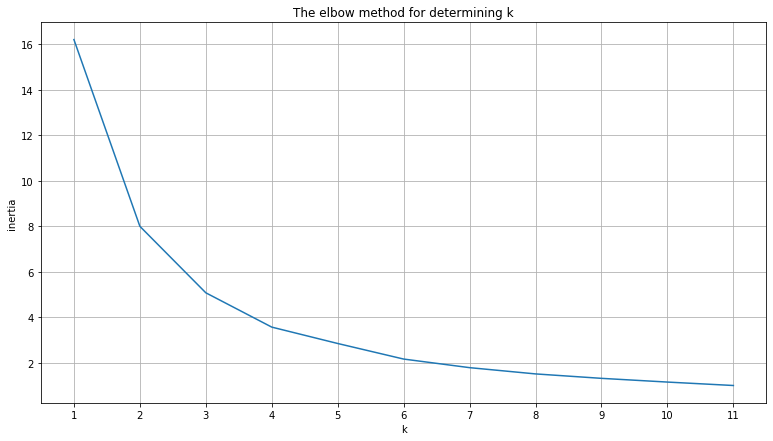

In [27]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X2)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

##### Selecting K and Fitting Features

In [28]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X2)
train['cluster'] = kmeans.labels_

##### Plotting Clusters

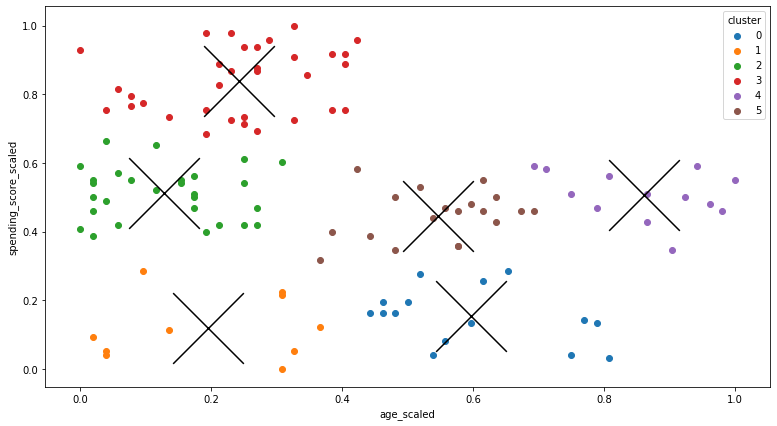

In [29]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.age_scaled, subset.spending_score_scaled, label=cluster)
ax.legend(title='cluster')
ax.set(xlabel='age', ylabel='spending score')

train.groupby('cluster').mean().plot.scatter(x='age_scaled', y='spending_score_scaled', marker='x', s=5000, ax=ax, c='black')
plt.show()

### Exercise 3
- How does scaling impact the results of clustering?

    - Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

##### Choosing Features

In [30]:
X1 = train[['annual_income', 'spending_score']]

##### Optimmizing for K

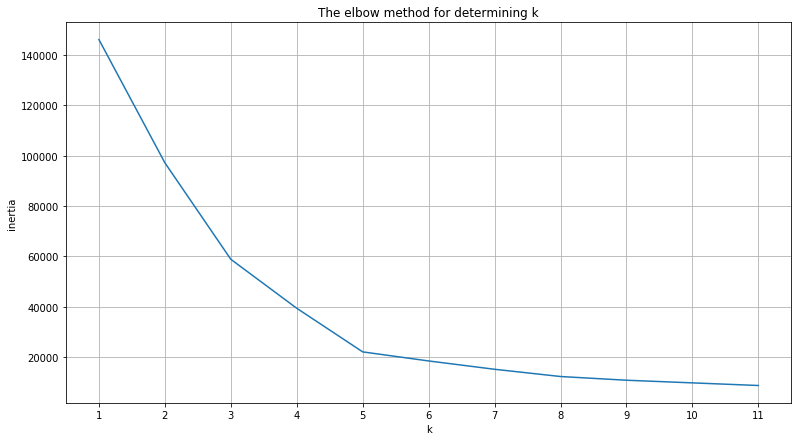

In [31]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X1)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

##### Selecting K and Fitting Features

In [32]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X1)
train['cluster'] = kmeans.labels_

##### Plotting Clusters

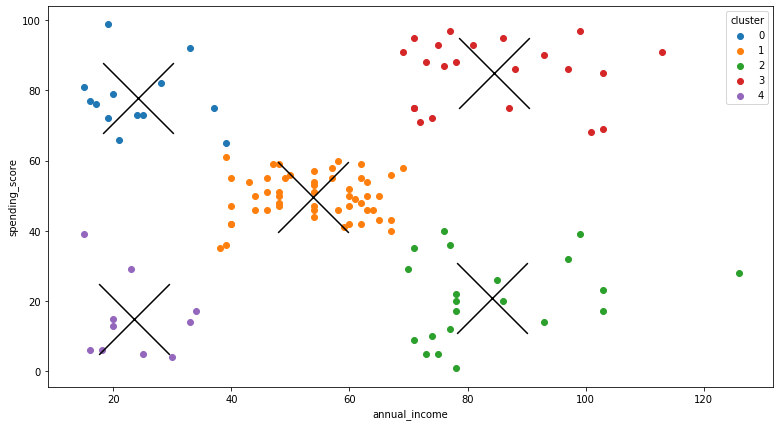

In [33]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.annual_income, subset.spending_score, label=cluster)
ax.legend(title='cluster')
ax.set(xlabel='annual income', ylabel='spending score')

train.groupby('cluster').mean().plot.scatter(x='annual_income', y='spending_score', marker='x', s=5000, ax=ax, c='black')
plt.show()

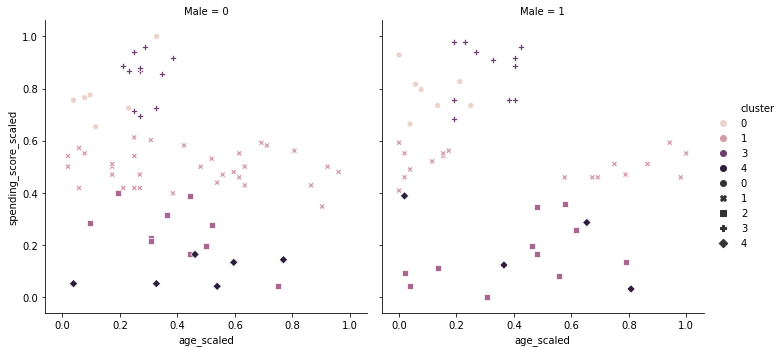

In [37]:
sns.relplot(x='age_scaled', y = 'spending_score_scaled', style = 'cluster', hue = 'cluster', col = 'Male', data = train)
plt.show()

##### Choosing Features

In [ ]:
X2 = train[['age', 'spending_score']]

##### Optimizing for K

In [ ]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X2)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

##### Selecting K and Fitting Features

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X2)
train['cluster'] = kmeans.labels_

##### Plotting Clusters

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.age, subset.spending_score, label=cluster)
ax.legend(title='cluster')
ax.set(xlabel='age', ylabel='spending score')

train.groupby('cluster').mean().plot.scatter(x='age', y='spending_score', marker='x', s=5000, ax=ax, c='black')
plt.show()

<div class="alert alert-block alert-info"><b>Takeaways:</b>

- Not much changes but I believe it is because the unscaled data is relatively the same than the unscaled data.
    - age is under 100 and annual score is over 100 and the spending score ends at 100
- The cluster value changed slightly but only for the age, not annual income
- On data that is much less balanced, the results and clustering would be very skewed.
</div>